# Predict Titanic Casualties
This is my first attempt on Kaggle competition. The goal is to achieve accuracy of 80% on the testing sample.  My strategy is to understand the data and then experiment with different common methodologies.

## Exploratory Data Analysis
The first step at data exploration is to identify the missing values.

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("train.csv")
l = train.shape[0]

test = pd.read_csv('test.csv')
test['Survived'] = -1 # code unknown survived = -1

all_data = pd.concat([train, test], axis = 0, ignore_index = True, sort = True)

In [2]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


Four fields in the whole sampels of both training and testing samples have missing values.  I decide to discretize **Age** variable and impute the missing **Fare**.  **Cabin** and **Embarked** are categorical; therefore, an Unknown category is assigned. 

In [3]:
all_data.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

### Ticket
**Ticket** is one of the most interesting field to investigate.  Firstly, there seems to be no unified pattern in the ticket number.  However, a quick data summary reveals that many passengers have the same ticket number.  Fares seem to be calculated by the total fares of the same ticket number.  It may be more informative to use **Fare per Ticket** as a feature.

In [4]:
all_data.sort_values(['Ticket']).head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
504,16.0,B79,S,86.5000,"Maioni, Miss. Roberta",0,505,1,female,0,1,110152
257,30.0,B77,S,86.5000,"Cherry, Miss. Gladys",0,258,1,female,0,1,110152
759,33.0,B77,S,86.5000,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,760,1,female,0,1,110152
585,18.0,E68,S,79.6500,"Taussig, Miss. Ruth",2,586,1,female,0,1,110413
262,52.0,E67,S,79.6500,"Taussig, Mr. Emil",1,263,1,male,1,0,110413
558,39.0,E67,S,79.6500,"Taussig, Mrs. Emil (Tillie Mandelbaum)",1,559,1,female,1,1,110413
110,47.0,C110,S,52.0000,"Porter, Mr. Walter Chamberlain",0,111,1,male,0,0,110465
475,NaN,A14,S,52.0000,"Clifford, Mr. George Quincy",0,476,1,male,0,0,110465
1226,30.0,C106,S,26.0000,"Maguire, Mr. John Edward",0,1227,1,male,0,-1,110469
1049,42.0,D22,S,26.5500,"Borebank, Mr. John James",0,1050,1,male,0,-1,110489


In [5]:
ticket_tab = all_data.groupby(['Ticket']).size()
ticket_tab.rename('ticket_counts', inplace = True)

Ticket
110152               3
110413               3
110465               2
110469               1
110489               1
110564               1
110813               2
111163               1
111240               1
111320               1
111361               2
111369               1
111426               1
111427               1
111428               1
112050               1
112051               1
112052               1
112053               1
112058               2
112059               1
112277               1
112377               1
112378               2
112379               1
112901               1
113028               1
113038               1
113043               1
113044               1
                    ..
STON/O 2. 3101273    1
STON/O 2. 3101274    1
STON/O 2. 3101275    1
STON/O 2. 3101280    1
STON/O 2. 3101285    1
STON/O 2. 3101286    1
STON/O 2. 3101288    1
STON/O 2. 3101289    1
STON/O 2. 3101291    1
STON/O 2. 3101292    1
STON/O 2. 3101293    1
STON/O 2. 3101294    1
STON

In [6]:
all_data = all_data.join(ticket_tab, on = 'Ticket').sort_values(['Ticket'])

In [7]:
all_data['fare_per_ticket'] = all_data['Fare']/all_data['ticket_counts']

## Cabin
Assuming **Cabin** starting with the same letter should be close to each other, I define a new feature **deck** to capture this assumption in the data.  **deck** is defined as the first letter of **Cabin**.

In [8]:
all_data.loc[all_data['Cabin'].isna(), 'Cabin'] = 'Unknown'
all_data['deck'] = [x[0] if x != 'Unknown' else 'Unknown' for x in all_data['Cabin']]

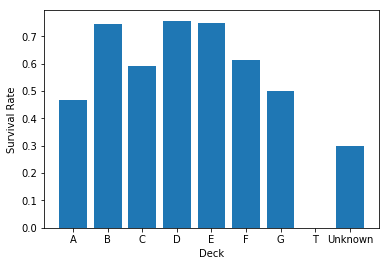

In [9]:
plt_df = all_data.loc[all_data['Survived'] != -1, ['deck', 'Survived']].groupby(['deck']).mean()
from matplotlib import pyplot as plt
plt.bar(plt_df.index, plt_df['Survived'])
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.show()

## Title
**Name** is another field I have not used yet.  I extract the title in the name and then combine different titles into **Mr.**, **Mrs.**, **Ms.**, and **Master.**. 

In [10]:
title = []
for j in range(len(all_data['Name'])):
    title.append([w for w in all_data['Name'][j].split() if w.endswith('.')][0])
all_data['title'] = title

# group titles
mapping = {'Mlle.': 'Miss.', 'Major.': 'Mr.', 'Col.': 'Mr.', 'Sir.': 'Mr.',
           'Don.': 'Mr.', 'Mme.': 'Miss.', 'Jonkheer.': 'Mr.', 'Lady.': 'Mrs.',
           'Capt.': 'Mr.', 'Countess.': 'Mrs.', 'Ms.': 'Miss.', 'Dona.': 'Mrs.', 'Rev.': 'Mr.',}
all_data.replace({'title': mapping}, inplace = True)
# Dr. is ambiguous in gender
all_data.loc[[x == "Dr." and y == "female" for x, y in zip(all_data['title'], all_data['Sex'])], "title"] = "Mrs."
all_data.loc[[x == "Dr." and y == "male" for x, y in zip(all_data['title'], all_data['Sex'])], "title"] = "Mr."

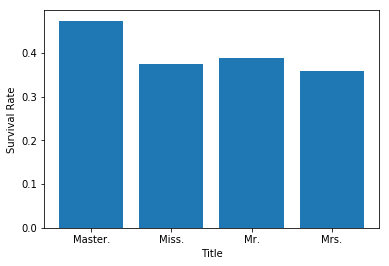

In [11]:
plt_df = all_data.loc[all_data['Survived'] != -1, ['title', 'Survived']].groupby('title').mean()
from matplotlib import pyplot as plt
plt.bar(plt_df.index, plt_df['Survived'])
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.show()

## Age
Two strategies can be employed to deal with missing **Age**.  We can impute missing ages and treat **Age** as a numerical feature.  Or we can impute any number and discretize **Age** so that the imputed number means missing.  I adopt the second strategy in this exercise.

In [12]:
# replace missing age with -99
all_data.loc[all_data['Age'].isna(), 'Age'] = -99

In [13]:
import math
all_data['age_group'] = [math.ceil(x/5) if x != -99 else -99 for x in all_data['Age']]
all_data.groupby(['age_group']).size()

age_group
-99    263
 1      56
 2      30
 3      29
 4     133
 5     195
 6     166
 7     115
 8      95
 9      72
 10     60
 11     36
 12     26
 13     23
 14      4
 15      4
 16      2
dtype: int64

In [14]:
plt_data = all_data[all_data['Survived'] != -1]
age_surv = plt_data.loc[plt_data['Survived'] == 1, 'Age']
age_nosurv = plt_data.loc[plt_data['Survived'] == 0, 'Age']

The following graphic compares the survival rates for different ages.  Children seems to have a higher survival rate while older people most likely did not make it.

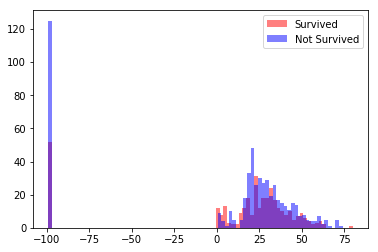

In [15]:
from matplotlib import pyplot as plt
plt.hist(age_surv, bins = int(80/1), color = 'r', label = 'Survived', alpha = 0.5)
plt.hist(age_nosurv, bins = int(80/1), color = 'b', label = 'Not Survived', alpha =0.5)
plt.legend(loc = 'upper right')
plt.show()

## Embarked

In [16]:
all_data.loc[all_data['Embarked'].isna(), 'Embarked'] = 'Unknown'

## Fare
One missing fare in the testing dataset. I impute it based on its class and where he boarded the ship.

In [17]:
all_data.loc[all_data['Fare'].isna(), :]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,ticket_counts,fare_per_ticket,deck,title,age_group
1043,60.5,Unknown,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,-1,3701,1,NaN,Unknown,Mr.,13


Use the median fare per ticket of people embarking from S and in Pclass 3 to impute.

In [18]:
fare_tab = all_data[['Pclass', 'Embarked', 'fare_per_ticket']].groupby(['Pclass', 'Embarked']).median()

In [19]:
all_data.loc[all_data['Fare'].isna(), 'Fare'] = fare_tab['fare_per_ticket'][3]['S']
all_data.loc[all_data['fare_per_ticket'].isna(), 'fare_per_ticket'] = fare_tab['fare_per_ticket'][3]['S']

## Family Size
The difference between family size and the ticket counts can be used to infer whether a nanny or a servant traveled with the family.

In [20]:
all_data['family_size'] = all_data['Parch'] + all_data['SibSp'] + 1
all_data[['family_size', 'ticket_counts']].head(20)

,family_size,ticket_counts
504,1,3
257,1,3
759,1,3
585,3,3
262,3,3
558,3,3
110,1,2
475,1,2
1226,1,1
1049,1,1


In [21]:
all_data['companions'] = all_data['ticket_counts'] - all_data['family_size']

## Start Training Models

In [22]:
test_ix = np.where(all_data['Survived'] == -1)[0]
train_ix = np.where(all_data['Survived'] != -1)[0]

### Define Variables

In [23]:
print(all_data.columns)
var_cat = ['Embarked',  'Pclass', 'Sex', 'deck', 'title', 'age_group']
var_num = ['Parch', 'SibSp', 'fare_per_ticket', 'family_size', 'companions', 'ticket_counts']

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'ticket_counts',
       'fare_per_ticket', 'deck', 'title', 'age_group', 'family_size',
       'companions'],
      dtype='object')


### Data Preprocessing

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

def process_data(data, var_num, var_cat):
    lst = []
    for i in range(len(var_cat)):
        encoder = LabelEncoder()
        encoded = encoder.fit_transform(data[var_cat[i]].values)
        encoder = OneHotEncoder()
        lst.append(encoder.fit_transform(encoded.reshape(-1, 1)).toarray())
    out_cat = np.concatenate(lst, axis = 1)
    scaler = StandardScaler()
    out_num = scaler.fit_transform(data[var_num].values)
    out = np.concatenate([out_num, out_cat], axis = 1)
    targets = data['Survived'].values
    return out, targets

In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 9, random_state = 42)
x_all, y_all = process_data(all_data, var_num, var_cat)
x = x_all[train_ix]
y = y_all[train_ix]    

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param = {'min_impurity_decrease': [0, 0.001, 0.005, 0.01, 0.05]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, param, cv = kf, verbose = 1, scoring = 'accuracy')
clf.fit(x, y)

Fitting 9 folds for each of 5 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=9, random_state=42, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_impurity_decrease': [0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [27]:
print(clf.best_params_)
print(clf.best_score_)

{'min_impurity_decrease': 0.005}
0.8204264870931538


In [28]:
dtc = DecisionTreeClassifier(min_impurity_decrease = 0.005)
dtc.fit(x, y)
dtc.feature_importances_

array([0.        , 0.        , 0.03021405, 0.03452053, 0.02442377,
       0.05513946, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.15127986, 0.60402135, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06843938, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03196159,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

### Support Vector Machine

In [29]:
from sklearn.svm import SVC
param = [
    {'C': [1, 10, 100, 1000], 'kernel':['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001], 'kernel':['rbf']},
    {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5, 6], 'kernel':['poly']}
]
svc = SVC()
clf = GridSearchCV(svc, param, cv = kf, verbose = 1, scoring = 'accuracy')
clf.fit(x, y)

Fitting 9 folds for each of 36 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:  2.3min finished


GridSearchCV(cv=KFold(n_splits=9, random_state=42, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}, {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [30]:
print(clf.best_score_)
print(clf.best_params_)

0.8148148148148148
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [31]:
svc = SVC(C = 1000, gamma = 0.001, kernel ='rbf')
svc.fit(x, y)
svc.support_vectors_

array([[ 0.71076309,  0.48128777,  0.87089402, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4449995 , -0.47908676,  1.38393622, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4449995 , -0.47908676,  1.75303133, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.4449995 , -0.47908676, -0.50398526, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4449995 , -0.47908676, -0.31390128, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4449995 , -0.47908676, -0.31390128, ...,  0.        ,
         0.        ,  0.        ]])

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
param = {'C': [1, 10, 100, 1000]}
lr = LogisticRegression()
clf = GridSearchCV(lr, param, cv = kf, verbose = 1, scoring = 'accuracy')
clf.fit(x, y)

Fitting 9 folds for each of 4 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=9, random_state=42, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)

In [33]:
print(clf.best_score_)
print(clf.best_params_)

0.7991021324354658
{'C': 10}


In [34]:
lr = LogisticRegression(C = 10)
lr.fit(x, y)
lr.coef_

array([[-7.84798303e-03, -2.54908400e-01,  2.97756322e-01,
        -1.71958610e-01,  1.28934432e-01, -7.48868016e-02,
         8.85927320e-02, -2.24141365e-03, -4.78796422e-01,
         5.70786171e-01,  3.72087155e-01,  3.89988574e-01,
        -5.83734661e-01,  1.52369355e+00, -1.34535248e+00,
         1.56400740e-01,  5.03932889e-01,  4.17976998e-02,
         9.77351174e-01,  1.50459693e+00,  4.68934017e-01,
        -1.52841225e+00, -1.55703270e+00, -3.89227431e-01,
         5.31026200e-01, -5.40661850e-02,  5.41623843e-02,
        -3.52781332e-01, -1.08408591e-02,  2.87292465e+00,
         7.16339711e-01,  8.97679788e-01,  2.06437766e-01,
        -1.03799400e-01,  3.48743208e-01,  6.64289357e-01,
        -1.49543470e-01, -9.14442451e-02, -5.64086630e-01,
        -4.86925974e-01, -1.08393904e+00, -9.69122090e-01,
        -1.86443492e+00, -2.12825462e+00,  1.92431784e+00]])

### Voting Classifier

In [35]:
from sklearn.ensemble import VotingClassifier
dtc = DecisionTreeClassifier(min_impurity_decrease = 0.005)
svc = SVC(C = 1000, gamma = 0.001, kernel = 'rbf')
lr = LogisticRegression(C = 10)
eclf = VotingClassifier(estimators = [('dtc', dtc), ('svc', svc), ('lr', lr)], voting = 'hard')
cv_res = []
for tr_ix, te_ix in kf.split(x):
    x_train, x_test, y_train, y_test = x[tr_ix], x[te_ix], y[tr_ix], y[te_ix]
    dtc.fit(x_train, y_train)
    svc.fit(x_train, y_train)
    lr.fit(x_train, y_train)
    cv_res.append(accuracy_score(y_test, [int(y1 + y2 + y3 >= 2) for y1, y2, y3 in zip(dtc.predict(x_test), svc.predict(x_test), lr.predict(x_test))]))

In [36]:
np.mean(cv_res)

0.8125701459034792

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
param = {
    'n_estimators': [10, 100, 500, 1000,],
    'max_depth': [1, 2, None],
    'max_features': [None, 'sqrt'], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01, 0.05]
}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, param, cv = kf, verbose = 1, scoring = 'accuracy')
clf.fit(x, y)

Fitting 9 folds for each of 120 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 10.8min finished


GridSearchCV(cv=KFold(n_splits=9, random_state=42, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 500, 1000], 'max_depth': [1, 2, None], 'max_features': [None, 'sqrt'], 'min_impurity_decrease': [0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [38]:
print(clf.best_score_)
print(clf.best_params_)

0.8271604938271605
{'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.005, 'n_estimators': 500}


### Gradient Boosting Machine

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
param = {
    'n_estimators': [10, 100, 500,],
    'max_depth': [1, 2, None],
    'max_features': [None, 'sqrt'], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01, ], 
    'learning_rate': [0.1, 0.01, 0.001]
}
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, param, cv = kf, verbose = 1, scoring = 'accuracy')
clf.fit(x, y)

Fitting 9 folds for each of 216 candidates, totalling 1944 fits


[Parallel(n_jobs=1)]: Done 1944 out of 1944 | elapsed: 15.0min finished


GridSearchCV(cv=KFold(n_splits=9, random_state=42, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 500], 'max_depth': [1, 2, None], 'max_features': [None, 'sqrt'], 'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 'learning_rate': [0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [40]:
print(clf.best_score_)
print(clf.best_params_)

0.8148148148148148
{'learning_rate': 0.01, 'max_depth': 2, 'max_features': 'sqrt', 'min_impurity_decrease': 0, 'n_estimators': 500}


### Neural Network

In [41]:
from tensorflow import set_random_seed
set_random_seed(42)

from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (x.shape[1], )))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

res = model.fit(x, y, epochs = 40, batch_size = 1, validation_split = 0.33)

Using TensorFlow backend.


Train on 596 samples, validate on 295 samples
Epoch 1/40
596/596 [==============================] - 1s 2ms/step - loss: 0.6489 - acc: 0.5772 - val_loss: 0.6007 - val_acc: 0.6644
Epoch 2/40
596/596 [==============================] - 1s 1ms/step - loss: 0.5303 - acc: 0.7232 - val_loss: 0.5762 - val_acc: 0.7186
Epoch 3/40
596/596 [==============================] - 1s 1ms/step - loss: 0.4862 - acc: 0.7785 - val_loss: 0.5328 - val_acc: 0.7627
Epoch 4/40
596/596 [==============================] - 1s 1ms/step - loss: 0.4634 - acc: 0.7785 - val_loss: 0.5029 - val_acc: 0.7831
Epoch 5/40
596/596 [==============================] - 1s 1ms/step - loss: 0.4356 - acc: 0.8054 - val_loss: 0.5302 - val_acc: 0.7831
Epoch 6/40
596/596 [==============================] - 1s 1ms/step - loss: 0.4485 - acc: 0.8020 - val_loss: 0.5012 - val_acc: 0.8102
Epoch 7/40
596/596 [==============================] - 1s 1ms/step - loss: 0.4293 - acc: 0.8188 - val_loss: 0.4977 - val_acc: 0.8169
Epoch 8/40
596/596 [==========

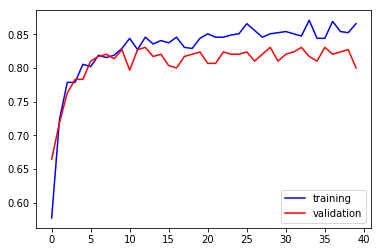

In [42]:
n_epochs = len(res.history['acc'])
plt.plot(range(n_epochs), res.history['acc'], color = 'b', label = 'training')
plt.plot(range(n_epochs), res.history['val_acc'], color = 'r', label = 'validation')
plt.legend()
plt.show()

## Output Predictions
A key finding in this exercise is that tree-based algorithm performs better than its alternatives, such as neural network, logistic regression, or support vector machine.  So far the best performing algorithms are random forest and gradient boosting machine.
### Final Models

In [43]:
x_test = x_all[test_ix]

In [44]:
dtc = DecisionTreeClassifier(min_impurity_decrease = 0.005)
dtc.fit(x, y)
dtc_pred = dtc.predict(x_test)

In [45]:
svc = SVC(C = 1000, gamma = 0.001, kernel = 'rbf')
svc.fit(x, y)
svc_pred = svc.predict(x_test)

In [46]:
lr = LogisticRegression(C = 10)
lr.fit(x, y)
lr_pred = lr.predict(x_test)

In [47]:
vote_pred = [int(x + y + z >= 2) for x, y, z in zip(lr_pred, svc_pred, dtc_pred)]

In [48]:
rfc = RandomForestClassifier(
    max_depth = None, 
    max_features = None, 
    min_impurity_decrease = 0.005, 
    n_estimators = 100
)
rfc.fit(x, y)
rfc_pred = rfc.predict(x_test)

In [49]:
gbc = GradientBoostingClassifier(
    max_depth = 2, 
    max_features = 'sqrt', 
    min_impurity_decrease = 0.005, 
    n_estimators = 100, 
    learning_rate = 0.1
)
gbc.fit(x, y)
gbc_pred = rfc.predict(x_test)

In [50]:
set_random_seed(42)

nnc = models.Sequential()
nnc.add(layers.Dense(16, activation = 'relu', input_shape = (x.shape[1], )))
nnc.add(layers.Dropout(0.1))
nnc.add(layers.Dense(16, activation = 'relu'))
nnc.add(layers.Dropout(0.1))
nnc.add(layers.Dense(1, activation = 'sigmoid'))
nnc.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

nnc.fit(x, y, epochs = 10, batch_size = 1)
nnc_pred = [int(x > 0.5) for x in nnc.predict(x_test)]

Epoch 1/10
891/891 [==============================] - 1s 1ms/step - loss: 0.6011 - acc: 0.6622
Epoch 2/10
891/891 [==============================] - 1s 893us/step - loss: 0.5006 - acc: 0.7654
Epoch 3/10
891/891 [==============================] - 1s 894us/step - loss: 0.4896 - acc: 0.7935
Epoch 4/10
891/891 [==============================] - 1s 890us/step - loss: 0.4684 - acc: 0.8025
Epoch 5/10
891/891 [==============================] - 1s 898us/step - loss: 0.4656 - acc: 0.8013
Epoch 6/10
891/891 [==============================] - 1s 890us/step - loss: 0.4517 - acc: 0.8114
Epoch 7/10
891/891 [==============================] - 1s 901us/step - loss: 0.4644 - acc: 0.8260
Epoch 8/10
891/891 [==============================] - 1s 893us/step - loss: 0.4570 - acc: 0.8159
Epoch 9/10
891/891 [==============================] - 1s 892us/step - loss: 0.4292 - acc: 0.8350
Epoch 10/10
891/891 [==============================] - 1s 893us/step - loss: 0.4330 - acc: 0.8350


### Output Final Results

In [51]:
yhat = gbc_pred
PassengerId = all_data.iloc[test_ix]['PassengerId'].reset_index()
Survived = pd.Series(yhat)

out = pd.concat([PassengerId, Survived], axis = 1, ignore_index = True)
out.columns = ['index', 'PassengerId', 'Survived']
out.set_index('index', inplace = True)
out.sort_values(['PassengerId']).to_csv('fin_pred.csv', index = False)